# Worksheet 13

Name:  Shaunak Joshi    
UID: U13870687    

### Topics

- Support Vector Machines

## Support Vector Machines

a) Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import random

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

# Dataset
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

# Initializing w and b
w = np.array([1, 1])
b = 0.1

# Perceptron Parameters
epochs = 100
alpha = .05

def snap(x, w, b, error):
    """
        Plot the street induced by w and b.
        Circle the point x in red if it was
        misclassified or in yellow if it was
        classified correctly.
    """

    xplot = np.linspace(-3, 3)
    cs = np.array([x for x in 'gb'])

    svm = (-w[0] * xplot - b) / w[1]
    left_svm = (-w[0] * xplot - b - 1) / w[1]
    right_svm = (-w[0] * xplot - b + 1) / w[1]

    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='y',fill=False))
    ax.plot(xplot, left_svm, 'g--', lw=2)
    ax.plot(xplot, svm, 'r-', lw=2)
    ax.plot(xplot, right_svm, 'b--', lw=2)
    ax.set_xlim(min(X[:, 0]) - 1, max(X[:,0]) + 1)
    ax.set_ylim(min(X[:, 1]) - 1, max(X[:,1]) + 1)
    fig.savefig(TEMPFILE)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE)).astype(np.uint8))


images = []
for _ in range(epochs):
    # pick a point from X at random
    i = random.randint(0, len(X) - 1)
    x, y = X[i], Y[i]
    error = False

    # Update w and b if misclassified
    if y * (np.dot(w, x) + b) <= 0:
        w = w + alpha * y * x
        b += alpha * y
        error = True

    images.append(snap(x, w, b, error))

images[0].save(
    'svm.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


b) Consider the following dataset:

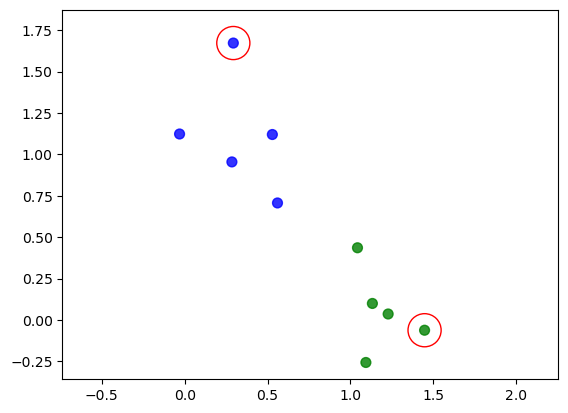

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

When an SVM is fitted to a dataset, it tries to find the maximum margin hyperplane that separates the classes. Support vectors are the data points that lie on or closest to the margin and have the most influence on the decision boundary. In the code you provided earlier, the points circled in red are the misclassified points, not necessarily support vectors. However, moving these points can still have an impact on the decision boundary. Here are some possible scenarios:

Moving the misclassified points closer to the correct class: If the circled points in red are moved closer to the correct class, it is likely that the SVM will re-fit with a better decision boundary, leading to a more accurate classification. The support vectors might change, and the margin could potentially increase, improving the overall model performance.

Moving the misclassified points further away from the correct class: If the circled points are moved further away from the correct class, it is possible that the SVM will continue to misclassify them or even misclassify additional points. The decision boundary might not change significantly if these points are not support vectors, but if they become support vectors, the margin may decrease, potentially leading to a less robust model.

Moving the misclassified points along the decision boundary: If the circled points are moved along the decision boundary without crossing it, the decision boundary might not change significantly, especially if these points are not support vectors. However, if they become support vectors, the margin and decision boundary might change.

c) If we were to fit an SVM to the above dataset, which points do you think would affect the decision boundary the most? Circle them in red.

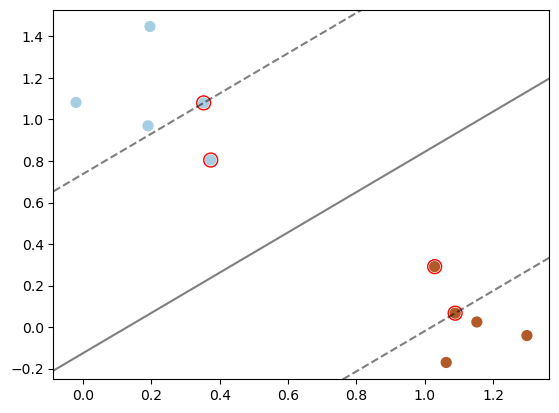

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Dataset
CENTERS = [[0, 1], [1, 0]]
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)

# Fit an SVM to the dataset
clf = SVC(kernel='linear', C=1)
clf.fit(X, labels)

def plot_decision_boundary(clf, X, y):
    fig, ax = plt.subplots()
    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=50)

    # Plot the decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Circle the support vectors in red
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r')

    plt.show()

plot_decision_boundary(clf, X, labels)


d) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [4]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    ...
    return im.fromarray(np.asarray(im.open(TEMPFILE)).astype(np.uint8))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    result = 0
    for i in range(len(alpha_i)):
        result += alpha_i[i] * Y[i] * np.dot(X[i], x)
    result += b
    return result

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    if y * predict(alpha_i, b, x) <= 0:
        alpha_i[i] += learning_rate
        b += learning_rate * y
        error = True
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [5]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

e) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

If an SVM with a polynomial kernel function is overfitting the data, it might be due to the model being too complex for the given dataset. One way to address this issue is by adjusting the degree parameter n of the polynomial kernel function. The polynomial kernel function is defined as:

K(x, y) = (γ * <x, y> + r)^n

Here, n is the degree of the polynomial, γ is a scale parameter, and r is a shift parameter.

To reduce overfitting, you can try the following:

Decrease the degree n: Lowering the degree of the polynomial kernel function will reduce the complexity of the model. This can help prevent overfitting by making the decision boundary smoother and less flexible. Try reducing the degree to a smaller value, such as 2 or 3, and see if the model performs better on the validation set.

Adjust the other kernel parameters: You can also try adjusting the scale parameter (γ) and the shift parameter (r) to control the influence of the kernel function. A smaller value for γ will reduce the influence of individual data points on the decision boundary, which can help to reduce overfitting. Changing the shift parameter (r) can also affect the shape of the decision boundary, so experimenting with different values may be helpful.

Regularization: Another approach to prevent overfitting is by adjusting the regularization parameter C in the SVM. A larger value of C will result in a smaller margin, allowing the model to fit the training data more closely, while a smaller value of C will result in a larger margin, increasing the tolerance for misclassification and potentially reducing overfitting. Try reducing the value of C to see if the model generalizes better to the validation set.

f) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

If an SVM with a Radial Basis Function (RBF) kernel function is underfitting the data, it might be due to the model being too simple for the given dataset. One way to address this issue is by adjusting the parameter sigma (or alternatively, the gamma parameter) of the RBF kernel function. The RBF kernel function is defined as:

K(x, y) = exp(-γ * ||x - y||^2)

Here, γ (gamma) is the inverse of the squared bandwidth (σ^2), and ||x - y||^2 is the squared Euclidean distance between the two data points.

To reduce underfitting, we can try the following:

Decrease the value of sigma (or increase gamma): Decreasing the value of sigma (or equivalently, increasing the value of gamma) will increase the influence of individual data points on the decision boundary. This can make the decision boundary more flexible, allowing the model to capture more complex relationships between the data points. Be cautious with this adjustment, as increasing gamma too much may lead to overfitting.

Regularization: Another approach to addressing underfitting is by adjusting the regularization parameter C in the SVM. A larger value of C will result in a smaller margin, allowing the model to fit the training data more closely, which can help to capture more complex relationships between the data points. Try increasing the value of C to see if the model generalizes better to the validation set.

g) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

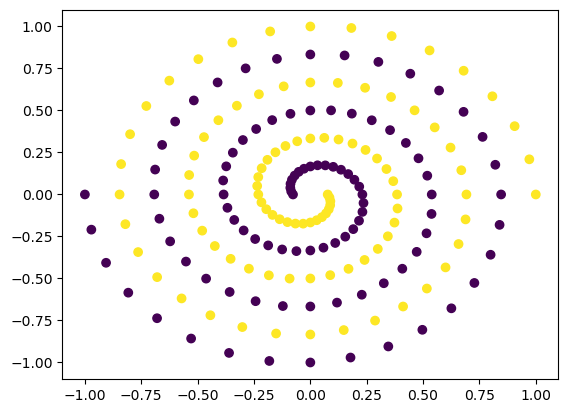

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)